In [ ]:
# Random Forest Implementation in Python

In [ ]:
#VoD_flashcrowd/X_flow.csv
from sklearn.ensemble import RandomForestRegressor
from numpy import genfromtxt, savetxt
from numpy import mean, concatenate, random
import time
from numpy import percentile
from sklearn.metrics import mean_absolute_error
A = genfromtxt('X_flow.csv', delimiter = ',', dtype = 'double')[1:]
B = genfromtxt('Y.csv' , delimiter = ',', dtype = 'double')[1:]
data_set = concatenate((A, B), axis = 1)
print(len(data_set))
print(len(data_set[0]))

random.shuffle(data_set)
training_set = data_set[:25644, 0:25]
target_set =  data_set [:25644, 38]
test_set = data_set [25644:36634, 0:25]
print (len(training_set))
#print (target_set)
print (len(test_set))
start = time.time()
rf = RandomForestRegressor(n_estimators=120, n_jobs = 24)
rf = rf.fit(training_set, target_set)
end = time.time()
print(end - start)
y_pred = rf.predict(test_set)
print(y_pred)
print("<<======================================================================================>>")
y_values = data_set[25644:36634, 38]
print(y_values)
MAE = mean_absolute_error(y_values, y_pred)
print(abs(y_values - y_pred))
#quantile_90 = percentile(abs(y_values - y_pred), 90) 
#print(quantile_90)
print(MAE)
m = mean(y_values) 
print(m)
print(MAE/m)
#print(quantile_90/m)


In [ ]:
#KV_periodic/X_cluster.csv
from sklearn.ensemble import RandomForestRegressor
from numpy import genfromtxt, savetxt
from numpy import mean, concatenate, random
import time
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
A = genfromtxt('X_cluster.csv', delimiter = ',', dtype = 'double')[1:]
B = genfromtxt('Y1.csv' , delimiter = ',', dtype = 'double')[1:]
data = concatenate((A, B), axis = 1)
print(len(data))
print(len(data[0]))
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
data_set = imp.transform(data)
random.shuffle(data_set)
training_set = data_set[:20274, :10374]
target_set =  data_set [:20274, 10376]
test_set = data_set [20274:28964, :10374]
print (len(training_set))
#print (target_set)
print (len(test_set))
start = time.time()
rf = RandomForestRegressor(n_estimators=120, n_jobs = 1)
rf = rf.fit(training_set, target_set)
end = time.time()
print(end - start)
y_pred = rf.predict(test_set)
print(y_pred)
print("<<======================================================================================>>")
y_values = data_set[20274:28964, 10376]
print(y_values)
MAE = mean_absolute_error(y_values, y_pred)
print(MAE)
m = mean(y_values) 
print(m)
print(MAE/m)


##### 

In [ ]:
#https://keras.io/optimizers/
#http://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from keras.models import Sequential
from keras.layers import Dense, Activation
from numpy import genfromtxt, savetxt
from numpy import mean, concatenate, random
from numpy import max, min
from sklearn import preprocessing 
from sklearn.metrics import mean_absolute_error
import time
import tensorflow as tf
#sess = tf.Session()

#http://stackoverflow.com/questions/39395198/configuring-tensorflow-to-use-all-cpus
#http://stackoverflow.com/questions/33758669/running-multiple-tensorflow-sessions-concurrently
sess = tf.Session(config=tf.ConfigProto(inter_op_parallelism_threads=24,
  intra_op_parallelism_threads=24))


model = Sequential()
model.add(Dense(200, input_dim = 25, init="normal", activation="relu")) 
#model.add(Dense(200, init='normal', activation='relu'))
model.add(Dense(1, activation="linear")) 


#model.compile(loss="mse", optimizer= "rmsprop", metrics=["accuracy"])
#model.compile(loss="mse", optimizer= "sgd", metrics=["accuracy"])
model.compile(loss="mse", optimizer= "adadelta", metrics=["accuracy"]) 


A = genfromtxt('X_flow.csv', delimiter = ',', dtype = 'double')[1:]
B = genfromtxt('Y.csv' , delimiter = ',', dtype = 'double')[1:]

min_max_scaler = preprocessing.MinMaxScaler()
A = min_max_scaler.fit_transform(A)

data_set = concatenate((A, B), axis = 1)
print(len(data_set))
print(len(data_set[0]))

#min_max_scaler = preprocessing.MinMaxScaler()
#data_set = min_max_scaler.fit_transform(data[:,0:25])

random.shuffle(data_set)
training_set = data_set[:25644, 0:25]
target_set =  data_set [:25644, 38]

test_set = data_set [25644:36634, 0:25]
y_set = data_set[25644:36634, 38]

#random.shuffle(data_set)
#test_set = data_set [:25644, 0:25]
#y_set = data_set[:25644, 38]

#random.shuffle(data_set)
#valid_set = data_set[:25644, 0:25]
#y_valid_set = data_set[:25644, 38]




start = time.time()
model.fit(training_set, target_set, nb_epoch=50, batch_size=100) 
end = time.time()
print("the training time is : ")
print(end - start)
#loss, accuracy = model.evaluate(valid_set, y_valid_set, batch_size = 25644)
#print(loss)
#print("====================================")
#print(accuracy)

predictions = model.predict(test_set)
print(predictions)
print(max(predictions))
print(min(predictions))

mae = mean_absolute_error(y_set, predictions)
nmae = mae / mean(y_set)
print(nmae)

print("==============================")
#print sess.run(model)



In [ ]:
#https://keras.io/optimizers/
from keras.models import Sequential
from keras.layers import Dense, Activation
from numpy import genfromtxt, savetxt
from numpy import mean, concatenate, random
from numpy import max, min
from sklearn import preprocessing 
from sklearn.metrics import mean_absolute_error
import time
from sklearn.preprocessing import Imputer

import tensorflow as tf


sess = tf.Session(config=tf.ConfigProto(inter_op_parallelism_threads=8,
  intra_op_parallelism_threads=8))


model = Sequential()
#try with 100 or 200
model.add(Dense(200, input_dim = 10374, init="uniform", activation="relu")) 
#model.add(Dense(200, init='normal', activation='relu'))
model.add(Dense(1, activation="linear")) 


#model.compile(loss="mse", optimizer= "sgd", metrics=["accuracy"])
#model.compile(loss="mse", optimizer= "sgd", metrics=["accuracy"])
model.compile(loss="mse", optimizer= "adadelta", metrics=["accuracy"]) 


A = genfromtxt('X_cluster.csv', delimiter = ',', dtype = 'double')[1:]
B = genfromtxt('Y1.csv' , delimiter = ',', dtype = 'double')[1:]

imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
ip_data = imp.transform(A)

#imp1 = Imputer(missing_values='NaN', strategy='mean', axis=1)
#B = imp1.transform(B)

min_max_scaler = preprocessing.MinMaxScaler()
A = min_max_scaler.fit_transform(ip_data)

data_set = concatenate((A, B), axis = 1)



print(len(data_set))
print(len(data_set[0]))

#min_max_scaler = preprocessing.MinMaxScaler()
#data_set = min_max_scaler.fit_transform(data[:,0:25])

random.shuffle(data_set)
training_set = data_set[:20274, :10374]
target_set =  data_set [:20274, 10376]

test_set = data_set [20274:28964, :10374]
y_set = data_set[20274:28964, 10376]



#y_true.reshape(-1, 1)

#random.shuffle(data_set)
#test_set = data_set [:25644, 0:25]
#y_set = data_set[:25644, 38]

#random.shuffle(data_set)
#valid_set = data_set[:25644, 0:25]
#y_valid_set = data_set[:25644, 38]

start = time.time()
model.fit(training_set, target_set, nb_epoch=50, batch_size=100) 
end = time.time()
print("the training time is : ")
print(end - start)
#loss, accuracy = model.evaluate(valid_set, y_valid_set, batch_size = 25644)
#print(loss)
#print("====================================")
#print(accuracy)

predictions = model.predict(test_set)

imp2 = Imputer(missing_values='NaN' or 0 , strategy='mean', axis=1)
predictions = imp2.transform(predictions)

print(predictions)
print(max(predictions))
print(min(predictions))



mae = mean_absolute_error(y_set, predictions)
nmae = mae / mean(y_set)
print(nmae)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

fig, ax1 = plt.subplots()
t = [1, 2, 4, 8, 16, 24]
s1 = [80.6, 40.8, 21.0, 10.7, 5.80, 3.90]
s3 = [80.6, (80.6/2), 80.6/4, 80.6/8, 80.6/16, 80.6/24]
ax1.plot(t, s1, 'b-s')
ax1.plot(t, s3, 'y--.')
ax1.set_xlabel('number of cores')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('training time (in secs)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
plt.ylim([0,90])


ax2 = ax1.twinx()
s2 = [10.8, 10.7, 10.8, 10.8, 10.9, 10.9]
ax2.plot(t, s2, 'r-*')
ax2.set_ylabel('NMAE(in %)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.ylim([0,20])
#pyplot.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

fig, ax1 = plt.subplots()
t = [1, 2, 4, 8, 16, 24]
s1 = [4179.7, 2222.2, 1104.0, 573.7, 414.5, 288.5]
s3 = [4179.7/1, 4179.7/2, 4179.7/4, 4179.7/8, 4179.7/16, 4179.7/24 ]
ax1.plot(t, s1, 'b-s')
ax1.plot(t, s3, 'y--.')
ax1.set_xlabel('number of cores')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('training time (in secs)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
plt.ylim([0,4500])


ax2 = ax1.twinx()
s2 = [2.10, 2.11, 2.09, 2.12, 2.13, 2.13]
ax2.plot(t, s2, 'r-*')
ax2.set_ylabel('NMAE(in %)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.ylim([0,5])
#pyplot.legend()
plt.show()


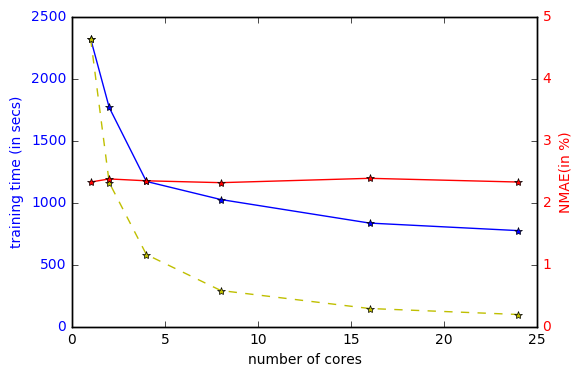

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

fig, ax1 = plt.subplots()
t = [1, 2, 4, 8, 16, 24]
s1 = [2321.2, 1766.4, 1169.7, 1024, 834, 773.2]
s3 = [2321.2/1, 2321.2/2, 2321.2/4, 2321.2/8, 2321.2/16, 2321.2/24 ]
ax1.plot(t, s1, 'b-*')
ax1.plot(t, s3, 'y--*')
ax1.set_xlabel('number of cores')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('training time (in secs)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
plt.ylim([0,2500])


ax2 = ax1.twinx()
s2 = [2.33, 2.38, 2.35, 2.32, 2.39, 2.33]
ax2.plot(t, s2, 'r-*')
ax2.set_ylabel('NMAE(in %)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.ylim([0,5])
#pyplot.legend()
plt.show()


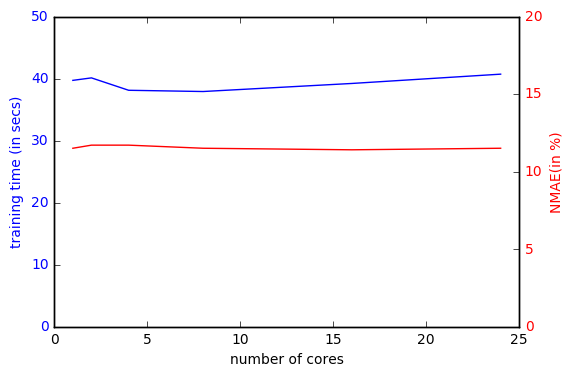

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

fig, ax1 = plt.subplots()
t = [1, 2, 4, 8, 16, 24]
s1 = [39.7, 40.1, 38.1, 37.9, 39.2, 40.7]
#s3 = [2321.2/1, 2321.2/2, 2321.2/4, 2321.2/8, 2321.2/16, 2321.2/24 ]
ax1.plot(t, s1, 'b-')
#ax1.plot(t, s3, 'g--')
ax1.set_xlabel('number of cores')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('training time (in secs)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
plt.ylim([0,50])


ax2 = ax1.twinx()
s2 = [11.5, 11.7, 11.7, 11.5, 11.4, 11.5]
ax2.plot(t, s2, 'r-')
ax2.set_ylabel('NMAE(in %)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.ylim([0,20])
#pyplot.legend()
plt.show()


In [2]:
#Univariate feature selection
# Feature Extraction with Univariate Statistical Tests 
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# load data
#KV_periodic/X_cluster.csv
from sklearn.ensemble import RandomForestRegressor
from numpy import genfromtxt, savetxt
from numpy import mean, concatenate, random
import time
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error


A = genfromtxt('X_cluster.csv', delimiter = ',', dtype = 'double')[1:]
B = genfromtxt('Y1.csv' , delimiter = ',', dtype = 'double')[1:]
data = concatenate((A, B), axis = 1)
print(len(data))
print(len(data[0]))
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
data_set = imp.transform(data)
#=============================================
X = data_set[:,:10374]
Y = data_set[:,10376]
# feature extraction
print(Y)
start1 = time.time()
test = SelectKBest(score_func=f_regression, k=100)
fit = test.fit(X, Y)
end1 = time.time()
print("the preprocessing time is")
print(end1-start1)
# summarize scores
numpy.set_printoptions(precision=3)
#print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features)
#=============================================
data_set = concatenate((features,data_set[:,10376:10377]), axis = 1)
random.shuffle(data_set)
print(len(data_set))
print(len(data_set[0]))
training_set = data_set[:20274, :100]
target_set =  data_set [:20274, 100]
test_set = data_set [20274:28964, :100]
print (len(training_set))
#print (target_set)
print (len(test_set))
print("training time is")
start = time.time()
rf = RandomForestRegressor(n_estimators=120, n_jobs = 24)
rf = rf.fit(training_set, target_set)
end = time.time()
print(end - start)
y_pred = rf.predict(test_set)
print(y_pred)
print("<<======================================================================================>>")
y_values = data_set[20274:28964, 100]
print(y_values)
MAE = mean_absolute_error(y_values, y_pred)
print(MAE)
m = mean(y_values) 
print(m)
print(MAE/m)





28962
10398
[ 73.825  56.241  56.852 ...,  52.133  52.167  52.672]


/home/surya/Anaconda/anaconda3/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= np.asarray(np.sqrt(safe_sqr(X).sum(axis=0))).ravel()
/home/surya/Anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/surya/Anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/surya/Anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


the preprocessing time is
9.838043689727783
[[  394.   389.   265. ...,  1325.  1419.  1323.]
 [  401.   491.   455. ...,   378.   420.   381.]
 [  498.   544.   541. ...,   412.   437.   412.]
 ..., 
 [   11.    10.     9. ...,    50.    59.    50.]
 [   17.    19.    15. ...,    37.    46.    37.]
 [   18.    17.    10. ...,    52.    61.    52.]]
28962
101
20274
8688
training time is
18.113481760025024
[ 54.084  54.284  54.177 ...,  52.757  55.925  53.837]
<<======================================================================================>>
[ 55.012  55.538  55.934 ...,  51.994  55.496  53.642]
1.2339500348
55.9675387546
0.0220476022754


In [ ]:
#Univariate feature selection
# Feature Extraction with Univariate Statistical Tests 
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# load data
#KV_periodic/X_cluster.csv
from sklearn.ensemble import RandomForestRegressor
from numpy import genfromtxt, savetxt
from numpy import mean, concatenate, random
import time
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error


A = genfromtxt('X_flow.csv', delimiter = ',', dtype = 'double')[1:]
B = genfromtxt('Y.csv' , delimiter = ',', dtype = 'double')[1:]
data = concatenate((A, B), axis = 1)
print(len(data))
print(len(data[0]))
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
data_set = imp.transform(data)
#=============================================
X = data_set[:,:25]
Y = data_set[:,38]
# feature extraction
start1=time.time()
test = SelectKBest(score_func=f_regression, k=10)
fit = test.fit(X, Y)
end1=time.time()
print("preprocessing time is")
print(end1-start1)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features)
print(len(features))
print(len(features[0]))
print(len(Y))
print(len(data_set[:,38]))
print(Y)
#=============================================
data_set = concatenate((features,data_set[:,38:39]), axis = 1)
random.shuffle(data_set)
print(len(data_set))
print(len(data_set[0]))
training_set = data_set[:25644, 0:10]
target_set =  data_set [:25644, 10]
test_set = data_set [25644:36634, 0:10]
print (len(training_set))
#print (target_set)
print (len(test_set))
start = time.time()
rf = RandomForestRegressor(n_estimators=120, n_jobs = 24)
rf = rf.fit(training_set, target_set)
end = time.time()
print(end - start)
y_pred = rf.predict(test_set)
print(y_pred)
print("<<======================================================================================>>")
y_values = data_set[25644:36634, 10]
print(y_values)
MAE = mean_absolute_error(y_values, y_pred)
print(MAE)
m = mean(y_values) 
print(m)
print(MAE/m)




In [ ]:
#Multivariate feature selection
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import numpy
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# load data
#KV_periodic/X_cluster.csv
from sklearn.ensemble import RandomForestRegressor
from numpy import genfromtxt, savetxt
from numpy import mean, concatenate, random
import time
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR


A = genfromtxt('X_flow.csv', delimiter = ',', dtype = 'double')[1:]
B = genfromtxt('Y.csv' , delimiter = ',', dtype = 'double')[1:]
data = concatenate((A, B), axis = 1)
print(len(data))
print(len(data[0]))
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
data_set = imp.transform(data)
#=============================================
X = data_set[:,:25]
Y = data_set[:,38]
# feature extraction
start1=time.time()
model = SVR(kernel="linear")
#model = LinearSVC()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
end1=time.time()
numpy.set_printoptions(precision=3)
print("preprocessing time is")
print(end1-start1)
print(Y)
#print("Num Features: %d") % fit.n_features_
#print("Selected Features: %s") % fit.support_
#print("Feature Ranking: %s") % fit.ranking_

features = fit.transform(X)
# summarize selected features
print(features)
print(len(features))
print(len(features[0]))
#=============================================
data_set = concatenate((features,data_set[:,38:39]), axis = 1)
random.shuffle(data_set)
print(len(data_set))
print(len(data_set[0]))
training_set = data_set[:25644, 0:10]
target_set =  data_set [:25644, 10]
test_set = data_set [25644:36634, 0:10]
print (len(training_set))
#print (target_set)
print (len(test_set))
start = time.time()
rf = RandomForestRegressor(n_estimators=120, n_jobs = 24)
rf = rf.fit(training_set, target_set)
end = time.time()
print(end - start)
y_pred = rf.predict(test_set)
print(y_pred)
print("<<======================================================================================>>")
y_values = data_set[25644:36634, 10]
print(y_values)
MAE = mean_absolute_error(y_values, y_pred)
print(MAE)
m = mean(y_values) 
print(m)
print(MAE/m)

36633
40


In [ ]:
#Multivariate feature selection
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import numpy
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
#KV_periodic/X_cluster.csv
from sklearn.ensemble import RandomForestRegressor
from numpy import genfromtxt, savetxt
from numpy import mean, concatenate, random
import time
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR



A = genfromtxt('X_cluster.csv', delimiter = ',', dtype = 'double')[1:]
B = genfromtxt('Y1.csv' , delimiter = ',', dtype = 'double')[1:]
data = concatenate((A, B), axis = 1)
print(len(data))
print(len(data[0]))
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
data_set = imp.transform(data)
#=============================================
X = data_set[:,:10374]
Y = numpy.asarray(data_set[:,10376], dtype='double')

print(Y)
# feature extraction
start1=time.time()
#model = LogisticRegression()
model = SVR(kernel="linear")
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
end1=time.time()
numpy.set_printoptions(precision=3)
print("preprocessing time is")
print(end1-start1)
#print("Num Features: %d") % fit.n_features_
#print("Selected Features: %s") % fit.support_
#print("Feature Ranking: %s") % fit.ranking_

features = fit.transform(X)
# summarize selected features
print(features)
print(len(features))
print(len(features[0]))
#=============================================
data_set = concatenate((features,data_set[:,10376:10377]), axis = 1)
random.shuffle(data_set)
print(len(data_set))
print(len(data_set[0]))
training_set = data_set[:20274, :5]
target_set =  data_set [:20274, 5]
test_set = data_set [20274:28964, :5]
print (len(training_set))
#print (target_set)
print (len(test_set))
start = time.time()
rf = RandomForestRegressor(n_estimators=120, n_jobs = 24)
rf = rf.fit(training_set, target_set)
end = time.time()
print(end - start)
y_pred = rf.predict(test_set)
print(y_pred)
print("<<======================================================================================>>")
y_values = data_set[20274:28964, 5]
print(y_values)
MAE = mean_absolute_error(y_values, y_pred)
print(MAE)
m = mean(y_values) 
print(m)
print(MAE/m)

In [ ]:
import numpy
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
#KV_periodic/X_cluster.csv
from sklearn.ensemble import RandomForestRegressor
from numpy import genfromtxt, savetxt
from numpy import mean, concatenate, random
import time
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import RandomizedLogisticRegression

A = genfromtxt('X_cluster.csv', delimiter = ',', dtype = 'double')[1:]
B = genfromtxt('Y1.csv' , delimiter = ',', dtype = 'double')[1:]
data = concatenate((A, B), axis = 1)
print(len(data))
print(len(data[0]))
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
data_set = imp.transform(data)

X = data_set[:,:10374]
Y = data_set[:,10376]

print(Y)
# feature extraction
start1=time.time()
#model = LogisticRegression()

model = RandomizedLogisticRegression(n_resampling=10000, n_jobs=24)
fit = model.fit(X, Y)

end1=time.time()

numpy.set_printoptions(precision=3)

print("preprocessing time is")
print(end1-start1)
#print("Num Features: %d") % fit.n_features_
#print("Selected Features: %s") % fit.support_
#print("Feature Ranking: %s") % fit.ranking_

features = fit.transform(X)
# summarize selected features
print(features)
print(len(features))
print(len(features[0]))

data_set = concatenate((features,data_set[:,10376:10377]), axis = 1)
random.shuffle(data_set)
print(len(data_set))
print(len(data_set[0]))
training_set = data_set[:20274, :10000]
target_set =  data_set [:20274, 10000]
test_set = data_set [20274:28964, :10000]
print (len(training_set))
#print (target_set)
print (len(test_set))
start = time.time()
rf = RandomForestRegressor(n_estimators=120, n_jobs = 24)
rf = rf.fit(training_set, target_set)
end = time.time()
print(end - start)
y_pred = rf.predict(test_set)
print(y_pred)
print("<<======================================================================================>>")
y_values = data_set[20274:28964, 10000]
print(y_values)
MAE = mean_absolute_error(y_values, y_pred)
print(MAE)
m = mean(y_values) 
print(m)
print(MAE/m)